In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
%matplotlib inline

class SLP(object):
  def __init__(self, eta=0.05, random_state=1):
    self.eta = eta
    self.random_state = random_state

  def fit(self, X, y):
    self.percetrons = []

    for i in y:
      pp = Perceptron(eta0 = self.eta, random_state = self.random_state)
      pp.fit(X, i)
      self.percetrons.append(pp)

  def predict(self, X):
    predicts = []

    for pp in self.percetrons:
      predicts.append(pp.predict(X))
    
    return predicts
      
  def misclassified(self, X, y):
    sum = 0

    m = self.predict(X)
    sum = (m != y).sum()

    return sum

  def show(self, X):
    number = 0
    fig, axs = plt.subplots(1,10, figsize=(20,20))

    for xi in X:
      xi = np.reshape(xi, (7, 5))
      axs[number].imshow(xi)
      number = number + 1

In [ ]:
net = SLP()

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['letters.data']),header=None)

Saving letters.data to letters.data


In [ ]:
XX = df.iloc[[1, 3, 6, 7, 15, 16, 18, 21, 23, 25]]

In [ ]:
X = XX.iloc[:,:35].values
X

array([[ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
         1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
         1,  1, -1],
       [ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
         1,  1, -1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
        -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,
         1,  1, -1],
       [ 1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
         1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        -1, -1,  1],
       [ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
         1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        -1, -1, -1],
       [-1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
         1,  1,  1],
       [-1

In [ ]:
y = np.eye( 10 )
y = np.where( y == 0, -1, 1 )
y

array([[ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1,  1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]])

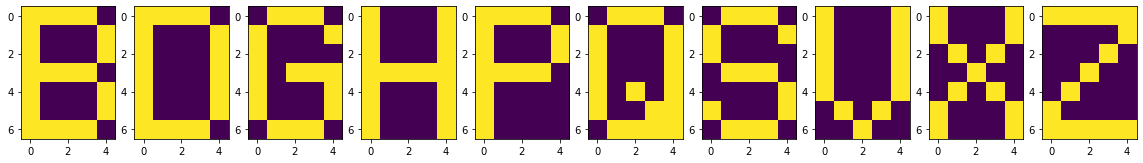

In [ ]:
net.show( X )

In [ ]:
net.fit( X , y )

In [ ]:
net.predict( X )

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.misclassified( X , y )

0

In [ ]:
def damage(X, precent, seed=1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*precent/100)

  for indeks_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1], count, replace=False))
    for indeks_pixel in order:
      result[indeks_example][indeks_pixel]*=-1

  return result

In [ ]:
damaged5 = damage( X , 5 )
damaged15 = damage( X , 15 )
damaged40 = damage( X , 40 )

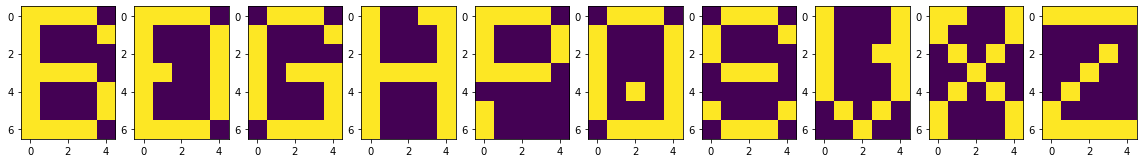

In [ ]:
net.show( damaged5 )

In [ ]:
net.predict( damaged5 )

[array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.misclassified( damaged5 , y)

1

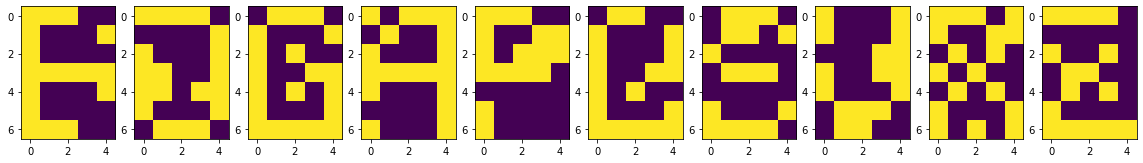

In [ ]:
net.show( damaged15 )

In [ ]:
net.predict( damaged15 )

[array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1,  1, -1, -1,  1]),
 array([-1, -1,  1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.misclassified( damaged15 , y)

9

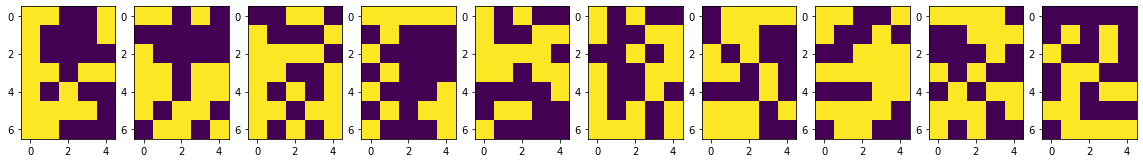

In [ ]:
net.show( damaged40 )

In [ ]:
net.predict( damaged40 )

[array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1]),
 array([-1, -1, -1, -1,  1,  1,  1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1,  1,  1, -1,  1, -1]),
 array([-1, -1, -1,  1, -1,  1, -1,  1, -1,  1]),
 array([ 1, -1, -1,  1,  1, -1,  1, -1, -1, -1]),
 array([-1,  1,  1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1,  1, -1,  1]),
 array([ 1,  1, -1,  1,  1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1, -1,  1])]

In [ ]:
net.misclassified(damaged40 , y)

35